# 等価回路のシンプル化　by SymPy
Libraries : Sympy, Control, Numpy, Pandas, math, Matplotlib   
抵抗・コンデンサ・インダクタ・動作前のダイオードの等価回路の計算　  
関連記事  
[【インピーダンス】今更ながらのLRC電気回路とBode,Niquistと伝達関数【Sympy control】](https://tom2rd.sakura.ne.jp/wp/2023/07/26/post-13277/)  
[【Python】インピーダンスから等価回路の常数を推定するライブラリ【複素数】](https://tom2rd.sakura.ne.jp/wp/2023/07/12/post-13233/)

In [36]:
# Sympyで、変数を定義　以下は文字として扱われる

from sympy import *
t=Symbol('t', real=True)
s=Symbol('s', real=True, positive=True)
R0=Symbol('R0', real=True, positive=True)
R1=Symbol('R1', real=True, positive=True)
R2=Symbol('R2', real=True, positive=True)
R3=Symbol('R3', real=True, positive=True)
C0=Symbol('C0', real=True, positive=True)
C1=Symbol('C1', real=True, positive=True)
C2=Symbol('C2', real=True, positive=True)
C3=Symbol('C3', real=True, positive=True)
L0=Symbol('L0', real=True, positive=True)
L1=Symbol('L1', real=True, positive=True)
L2=Symbol('L2', real=True, positive=True)
L3=Symbol('L3', real=True, positive=True)

# コンデンサ/キャパシタの等価回路
- C1 容量  
- C2 R1 誘電吸収因子 よくtanδ と言われるやつです  
- Esr　内部抵抗  
- Esl　内部インダクタンス    
いろいろな等価回路があるのでそのうちの一つ  
[コンデンサのインピーダンス](https://www.aictech-inc.com/information/capacitor_foundation04.html)

![Resistor](./EquivalentCircuit/Capacitor2.png)

Sympy　での計算　カッコの位置などを確認するため

In [42]:
# Fは ラプラス変換表記 
F=1/(s*C0 + 1/(1/(s*C1)+R0))+R1+s*L0

In [43]:
# F 式の形をみてみる。
F

L0*s + R1 + 1/(C0*s + 1/(R0 + 1/(C1*s)))

In [44]:
# 式を展開
F.simplify()

L0*s + R1 + 1/(C0*s + 1/(R0 + 1/(C1*s)))

In [55]:
# SympyのPhyics Controlライブラリを使って、伝達関数化  R1,L1,C1に値を代入して、Gという伝達関数にしてる
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot
G=F.subs([(R0,1E-1),(L0,5.5E-2),(C0,2.14E-6),(C1,1E-5),(R1,1E+1)])
G

0.055*s + 10.0 + 1/(2.14e-6*s + 1/(0.1 + 100000.0/s))

In [56]:
G.subs(s,1000)

147.440162936682

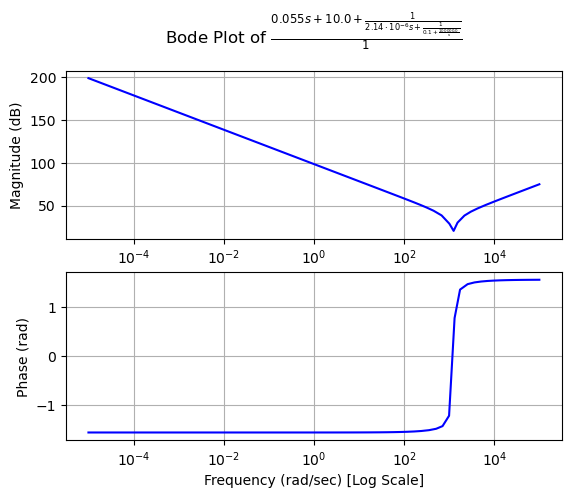

In [57]:
tf1 = TransferFunction(G,1,s)
bode_plot(tf1)   

ここまでで、一応、式の形を確認する。R1,L1,C1の値はいろいろ入れて、グラフの形を確認しておく。　

# Numpy で　数値的に計算
式が正しいと、数値的に計算できる。Sympy のLamdifyを使ってもNumpy形式の数値列にも変換できる

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def bodeHz(freq,G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(freq, np.abs(G))
    plt.xlabel("Frequency(Hz)")
    ax_mag.set_ylabel("Magnitude|G| ohm")
    ax_phase.semilogx(freq,  np.unwrap(np.angle(G)))
    ax_phase.set_ylabel("Phase(Rad)")

In [61]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

In [62]:
# logspaceに何かバグがあるようで、geomspaceを使いました
freqs=np.geomspace(1,1E+8,100)
s=(freqs/(2*math.pi))*1j

Imedance.py で予測した結果を　代入する　インピーダンス（F）の式は、上のSympyで入れたものを、そのまま
式ですが、数値列です。Sの値は、周波数から作り、定数もそのまま代入します。

In [63]:
R0=1E-1
L0=5.5E-2
C0=2.14E-6
C1=1E-5
R1=1E+1

F=1/(s*C0 + 1/(1/(s*C1)+R0))+R1+s*L0

In [64]:
(F[:0])

array([], dtype=complex128)

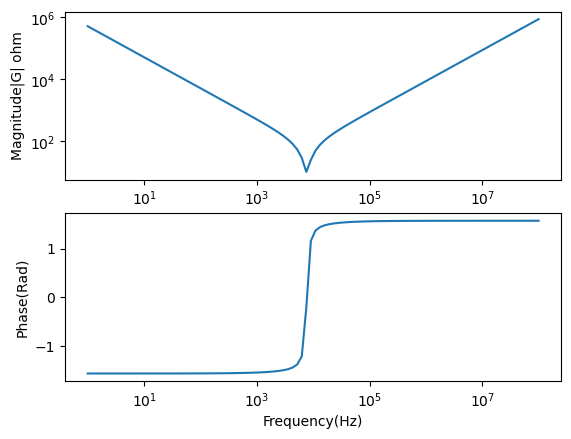

In [65]:
bodeHz(freqs,F)

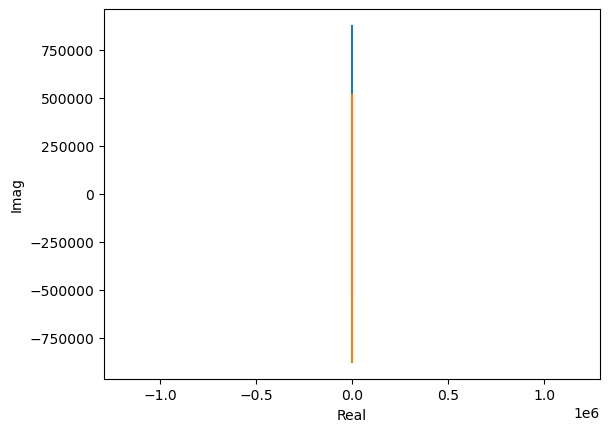

In [66]:
nyquist(F)

# 関連記事


[【インピーダンス】今更ながらのLRC電気回路とBode,Niquistと伝達関数【Sympy control】](https://tom2rd.sakura.ne.jp/wp/2023/07/26/post-13277/)  
[【Python】インピーダンスから等価回路の常数を推定するライブラリ【複素数】](https://tom2rd.sakura.ne.jp/wp/2023/07/12/post-13233/)